In [65]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/study_results .csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Checking number of mice
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [66]:
# Combine the data into a single dataset

combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking data for duplciates
data_check = combined_data.groupby(['Timepoint', 'Mouse ID']).count()
for index,row in data_check.iterrows():
    if row["Age_months"]>1:
        print(row)
        
# Dropping duplicate Mouse ID
clean_data = combined_data.loc[combined_data['Mouse ID'] != 'g989']

# Clean data
clean_data

Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (0, g989), dtype: int64
Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (5, g989), dtype: int64
Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (10, g989), dtype: int64
Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (15, g989), dtype: int64
Drug Regimen          2
Sex                   2
Age_months            2
Weight (g)            2
Tumor Volume (mm3)    2
Metastatic Sites      2
Name: (20, g989), dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [68]:
# Summary Statistics: Mean, Median, variance, standard deviation, and SEM, of tumor volume
regimen_df = clean_data.groupby('Drug Regimen')

mean_tumor = regimen_df['Tumor Volume (mm3)'].mean()

median_tumor = regimen_df['Tumor Volume (mm3)'].median()

std_tumor = regimen_df['Tumor Volume (mm3)'].std()

variance_tumor = regimen_df['Tumor Volume (mm3)'].var()

SEM_tumor = regimen_df['Tumor Volume (mm3)'].sem()

Summary_regimen_df = pd.DataFrame()
Summary_regimen_df['Mean'] = mean_tumor
Summary_regimen_df['Media'] = median_tumor
Summary_regimen_df['Standard Deviation'] = std_tumor
Summary_regimen_df['Variance'] = variance_tumor
Summary_regimen_df['SEM'] = SEM_tumor


Summary_regimen_df



,Mean,Media,Standard Deviation,Variance,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [69]:
# Summary Stats: Aggregate Method 

summary = regimen_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem'])



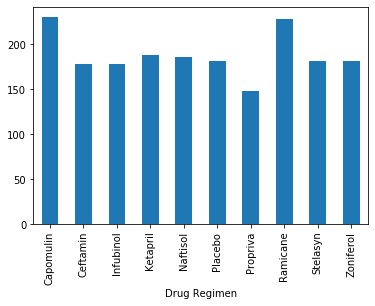

In [70]:
# Bar and Pie Charts 
# did they make it to the end of the experiment; most mice that lived throught the experience
timepoints = clean_data.groupby('Drug Regimen')['Timepoint'].count()

# plotted
timepoints.plot.bar()
plt.show()


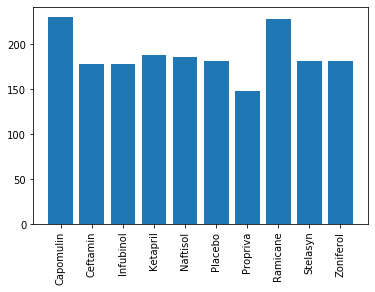

In [71]:
# Matplotlib barchart
x_axis = list(timepoints.index)
y_axis = timepoints.tolist()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)
plt.show()

In [72]:
# Quartiles, Outliers, Boxplots
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()
    
max_timepoint = pd.DataFrame(max_timepoint).reset_index()

merged_df = clean_data.merge(max_timepoint, on=['Mouse ID', 'Timepoint'])

merged_df['Drug Regimen'].value_counts()


Infubinol    25
Naftisol     25
Ketapril     25
Ceftamin     25
Placebo      25
Ramicane     25
Capomulin    25
Zoniferol    25
Propriva     24
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [80]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []


    # Locate the rows which contain mice on each drug and get the tumor volumes
for index,row in merged_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ramicane':
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Infubinol':
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == 'Ceftamin':
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])
     
         
    # add subset 

    
drug_regimen_df = pd.DataFrame()
drug_regimen_df["Capomulin"] = tumor_capomulin
drug_regimen_df["Ramicane"] = tumor_ramicane
drug_regimen_df["Infubinol"] = tumor_infubinol
drug_regimen_df["Ceftamin"] = tumor_ceftamin
    
drug_regimen_df
    
    
    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [110]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Capomulin
quartiles = drug_regimen_df['Capomulin'].quantile([0.25, 0.5, 0.75])
cap_lowerq = quartiles[0.25]
cap_upperq = quartiles[0.75]
cap_medianq = quartiles[0.5]
cap_iqr = upperq - lowerq

# Lower and upper bound outliers

cap_lower_bound = lowerq - (1.5*iqr)
cap_upper_bound = upperq + (1.5*iqr)
print(f"Capomulin values below {lower_bound} could be outliers.")
print(f"Capomulin Values above {upper_bound} could be outliers.")

capomulin_df = drug_regimen_df.loc[(drug_regimen_df['Capomulin']) < (cap_lower_bound) | (drug_regimen_df['Capomulin']) > (cap_upper_bound)]
capomulin_df




Capomulin values below 25.355449580000002 could be outliers.
Capomulin Values above 87.66645829999999 could be outliers.


TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]

In [108]:
# Determining outliers





# if row in drug_regimen_df["Capomulin"].iterrows():
#      if row[] > 87.6:
#         capomulin_values.append()
#     if row["Drug Regimen"] == 'Ramicane':
#         tumor_ramicane.append(row['Tumor Volume (mm3)'])
#     if row["Drug Regimen"] == 'Infubinol':
#         tumor_infubinol.append(row['Tumor Volume (mm3)'])
#     if row["Drug Regimen"] == 'Ceftamin':
#         tumor_ceftamin.append(row['Tumor Volume (mm3)'])
    






SyntaxError: invalid syntax (<ipython-input-108-e4711612b6c8>, line 3)

In [ ]:
# Ramicane
quartiles = drug_regimen_df['Ramicane'].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq - lowerq

# Lower and upper bound outliers

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane values below {lower_bound} could be outliers.")
print(f"Ramicane Values above {upper_bound} could be outliers.")

# Infubinol
quartiles = drug_regimen_df['Infubinol'].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq - lowerq

# Lower and upper bound outliers

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol values below {lower_bound} could be outliers.")
print(f"Infubinol Values above {upper_bound} could be outliers.")

# Ceftamin 
quartiles = drug_regimen_df['Ceftamin'].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
medianq = quartiles[0.5]
iqr = upperq - lowerq

# Lower and upper bound outliers

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin values below {lower_bound} could be outliers.")
print(f"Ceftamin Values above {upper_bound} could be outliers.")